In [6]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
X, y = make_moons(n_samples=1000, noise=.05)

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

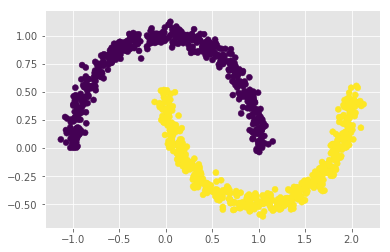

In [10]:
plt.scatter(X.T[0], X.T[1], c=y);

In [23]:
# From https://stats.stackexchange.com/a/137276
# Using the trick from sklearn: 
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/metrics/pairwise.py#L222
X2 = np.sum(np.multiply(X, X), axis=1)

In [25]:
X2.shape

(1000,)

In [26]:
X2 = X2.reshape(-1, 1)
X2.shape

(1000, 1)

In [30]:
K0 = X2 + X2.T - 2 * np.dot(X, X.T)

In [57]:
(X2 + X2.T).shape

(1000, 1000)

In [31]:
K0.shape

(1000, 1000)

In [33]:
K = np.power(np.exp(-1.0 / 1**2), K0)

In [37]:
from scipy.spatial.distance import pdist, squareform
import scipy
pairwise_dists = squareform(pdist(X, 'euclidean'))
M = scipy.exp(-pairwise_dists ** 2 / 1 ** 2)

In [38]:
K == M

array([[ True,  True,  True, ..., False,  True, False],
       [ True,  True,  True, ..., False,  True, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [ True,  True, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

In [43]:
from sklearn.metrics import pairwise_distances

In [48]:
N = np.exp(-pairwise_distances(X, metric='sqeuclidean'))

In [54]:
np.sum(K == N) / (K.shape[0] * K.shape[1])

0.243216

In [55]:
np.sum(M == N) / (M.shape[0] * M.shape[1])

0.62445

In [56]:
K - M

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.08166817e-17,  0.00000000e+00,  3.46944695e-17],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.55111512e-17,  0.00000000e+00,  1.04083409e-17],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.11022302e-16, -1.11022302e-16,  6.93889390e-17],
       ...,
       [ 2.08166817e-17,  5.55111512e-17,  1.11022302e-16, ...,
         0.00000000e+00, -5.55111512e-17,  3.33066907e-16],
       [ 0.00000000e+00,  0.00000000e+00, -1.11022302e-16, ...,
        -5.55111512e-17,  0.00000000e+00,  6.93889390e-18],
       [ 3.46944695e-17,  1.04083409e-17,  6.93889390e-17, ...,
         3.33066907e-16,  6.93889390e-18,  0.00000000e+00]])

In [88]:
L = np.power(D, -0.5) * N * np.power(D, -0.5)

In [89]:
L.shape

(1000, 1000)

In [90]:
lamb, V = np.linalg.eig(L)

In [91]:
Y = V[:, :2]

In [92]:
Y /= np.linalg.norm(Y, axis=1).reshape(-1, 1)

In [93]:
Y.shape

(1000, 2)

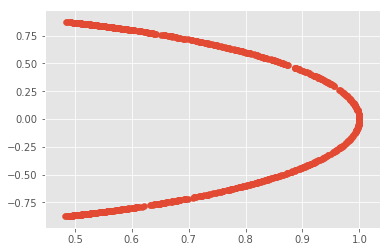

In [94]:
plt.scatter(Y.T[0], Y.T[1]);

In [95]:
from sklearn.cluster import KMeans

In [96]:
kmeans = KMeans(n_clusters=2)

In [97]:
kmeans.fit_predict(Y)

ValueError: Complex data not supported
[[ 0.52788732+0.j -0.84931441+0.j]
 [ 0.56790548+0.j -0.82309378+0.j]
 [ 0.87147265+0.j -0.49044411+0.j]
 ...
 [ 0.80768377+0.j  0.58961592+0.j]
 [ 0.71163203+0.j -0.70255238+0.j]
 [ 0.72079044+0.j  0.69315304+0.j]]


## Other attempt

/home/rahul/.local/lib/python3.5/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


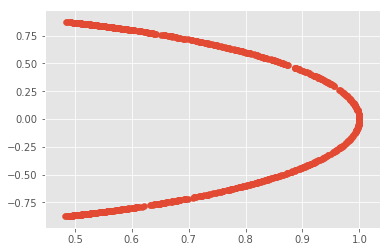

In [105]:
plt.scatter(Y.T[0], Y.T[1]);

## Simple Laplacian

In [182]:
N = np.exp(-1./(2 * 0.2 ** 2) * pairwise_distances(X, metric='sqeuclidean'))

In [183]:
D = np.sum(N, axis=1)

In [184]:
L = np.power(D, -0.5) * N * np.power(D, -0.5)

In [185]:
L.shape

(1000, 1000)

In [186]:
_, V = np.linalg.eig(L)

In [187]:
V[:, :2]

array([[-0.03385498+0.j,  0.04434771+0.j],
       [-0.03314323+0.j,  0.03908128+0.j],
       [-0.03348082+0.j,  0.02741185+0.j],
       ...,
       [-0.02616683+0.j,  0.01002212+0.j],
       [-0.03258895+0.j,  0.03077441+0.j],
       [-0.03476796+0.j, -0.03193326+0.j]])

In [188]:
V = np.real(V)

In [189]:
Y = V[:, :2]

In [190]:
Y

array([[-0.03385498,  0.04434771],
       [-0.03314323,  0.03908128],
       [-0.03348082,  0.02741185],
       ...,
       [-0.02616683,  0.01002212],
       [-0.03258895,  0.03077441],
       [-0.03476796, -0.03193326]])

In [191]:
Y /= np.linalg.norm(Y, axis=1).reshape(-1, 1)

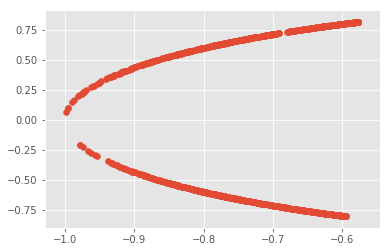

In [192]:
plt.scatter(Y.T[0], Y.T[1]);

In [193]:
kmeans = KMeans(n_clusters=2)

In [194]:
clusters = kmeans.fit_predict(Y)

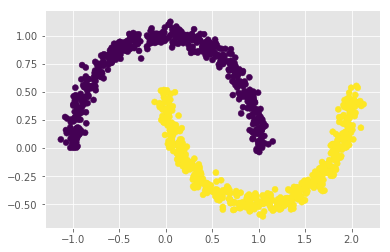

In [195]:
plt.scatter(X.T[0], X.T[1], c=clusters)

## With wrong variance

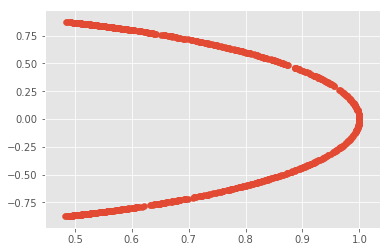

In [197]:
N = np.exp(-pairwise_distances(X, metric='sqeuclidean'))
D = np.sum(N, axis=1)
L = np.power(D, -0.5) * N * np.power(D, -0.5)
_, V = np.linalg.eig(L)
V = np.real(V)
Y = V[:, :2]
Y /= np.linalg.norm(Y, axis=1).reshape(-1, 1)
plt.scatter(Y.T[0], Y.T[1]);

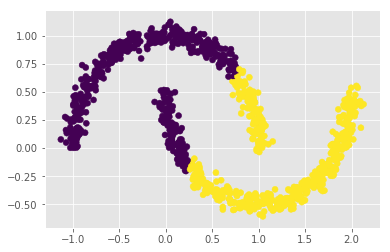

In [198]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(Y)
plt.scatter(X.T[0], X.T[1], c=clusters);